<a href="https://colab.research.google.com/github/rakhaizzandi/Kuliah/blob/main/TubesAKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import

In [ ]:
from google.colab import files
from prettytable import PrettyTable
import pandas as pd
import time
import matplotlib.pyplot as plt


Baca Data (CSV)

In [17]:

# Fungsi untuk meminta unggah file hanya jika diperlukan
def upload_csv():
    print("Upload file CSV Anda:")
    uploaded = files.upload()
    for file_name in uploaded.keys():
        print(f"File uploaded: {file_name}")
        return pd.read_csv(file_name)

# Meminta input eksplisit untuk memulai
start = input("Ketik 'start' untuk memulai upload file CSV: ")
if start.lower() == 'start':
    df = upload_csv()
    game_revenue = df.to_dict(orient='records')
    print(game_revenue)
else:
    print("Program dihentikan.")


Ketik 'start' untuk memulai upload file CSV: start
Upload file CSV Anda:


Saving game_revenue_15.csv to game_revenue_15 (4).csv
File uploaded: game_revenue_15 (4).csv
[{'game': 'AFK Journey', 'revenue': 16500.0}, {'game': 'Arknights', 'revenue': 8600.0}, {'game': 'Beyond the World', 'revenue': 8250.0}, {'game': 'Blue Archive', 'revenue': 10300.0}, {'game': 'CookieRun Kingdom', 'revenue': 5000.0}, {'game': 'Dragon Ball Legends', 'revenue': 10400.0}, {'game': 'Dragon Ball Z Dokkan Battle', 'revenue': 8000.0}, {'game': 'Fate/Grand Order', 'revenue': 21200.0}, {'game': 'Gakuen Idolmaster', 'revenue': 10000.0}, {'game': 'Genshin Impact', 'revenue': 51800.0}, {'game': 'Goddess of Victory NIKKE', 'revenue': 8000.0}, {'game': 'Hatsune Miku Colorful Stage', 'revenue': 10100.0}, {'game': 'Honkai Star Rail', 'revenue': 43300.0}, {'game': 'Light and Night', 'revenue': 5500.0}, {'game': 'Love and Deepspace', 'revenue': 39300.0}]


Fungsi Pengurutan

In [18]:
# Fungsi pengurutan iteratif
def sort_iterative(data):
    sorted_data = data[:]
    for i in range(len(sorted_data)):
        for j in range(i + 1, len(sorted_data)):
            if sorted_data[i]['revenue'] < sorted_data[j]['revenue']:
                sorted_data[i], sorted_data[j] = sorted_data[j], sorted_data[i]
    return sorted_data

# Fungsi pengurutan rekursif
def sort_recursive(data):
    if len(data) <= 1:
        return data
    pivot = data[0]
    greater = [x for x in data[1:] if x['revenue'] >= pivot['revenue']]
    lesser = [x for x in data[1:] if x['revenue'] < pivot['revenue']]
    return sort_recursive(greater) + [pivot] + sort_recursive(lesser)


Fungsi Utilitas

In [19]:
# Fungsi untuk mencetak tabel data
def print_data_comparison(original, sorted_data, n):
    table = PrettyTable()
    table.title = f"Comparison of Original and Sorted Data (n={n})"
    table.field_names = ["Original (Unsorted)", "Sorted by Revenue"]
    for i in range(n):
        original_entry = f"{original[i]['game']} ({original[i]['revenue']})"
        sorted_entry = f"{sorted_data[i]['game']} ({sorted_data[i]['revenue']})"
        table.add_row([original_entry, sorted_entry])
    print(table)

# Fungsi untuk mencetak tabel perbandingan waktu
def print_comparison_table(n_values, recursive_times, iterative_times):
    table = PrettyTable()
    table.field_names = ["n", "Recursive Time (s)", "Iterative Time (s)"]
    for n, r_time, i_time in zip(n_values, recursive_times, iterative_times):
        table.add_row([n, r_time, i_time])
    print(table)

# Fungsi untuk memperbarui grafik
def update_graph(n_values, recursive_times, iterative_times):
    plt.figure(figsize=(8, 5))
    plt.plot(n_values, recursive_times, label="Recursive", marker='o', color="blue")
    plt.plot(n_values, iterative_times, label="Iterative", marker='o', color="orange")
    plt.title("Performance Comparison: Recursive vs Iterative")
    plt.xlabel("Number of Data (n)")
    plt.ylabel("Execution Time (seconds)")
    plt.legend()
    plt.grid()
    plt.show()


Program Utama

+---------------------------------------------------------+
|       Comparison of Original and Sorted Data (n=5)      |
+----------------------------+----------------------------+
|    Original (Unsorted)     |     Sorted by Revenue      |
+----------------------------+----------------------------+
|   AFK Journey (16500.0)    |   AFK Journey (16500.0)    |
|     Arknights (8600.0)     |   Blue Archive (10300.0)   |
| Beyond the World (8250.0)  |     Arknights (8600.0)     |
|   Blue Archive (10300.0)   | Beyond the World (8250.0)  |
| CookieRun Kingdom (5000.0) | CookieRun Kingdom (5000.0) |
+----------------------------+----------------------------+
+-----------------------------------------------------------------------------+
|                Comparison of Original and Sorted Data (n=10)                |
+--------------------------------------+--------------------------------------+
|         Original (Unsorted)          |          Sorted by Revenue           |
+-------------------

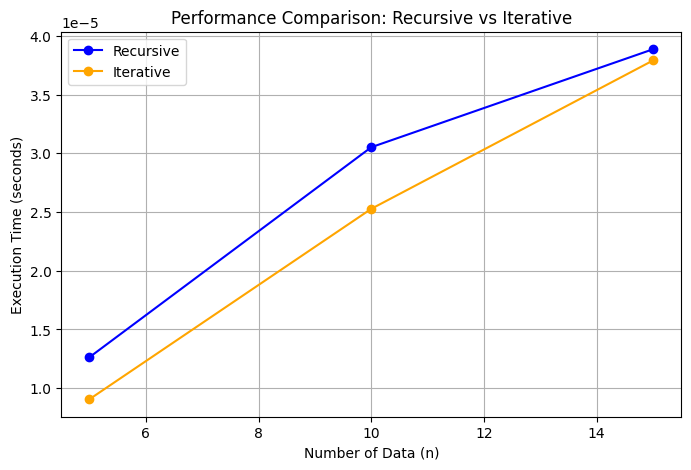

In [20]:
n_values = []
recursive_times = []
iterative_times = []

# Iterasi setiap 5 data
for i in range(5, len(game_revenue) + 1, 5):
    data_subset = game_revenue[:i]

    # Ukur waktu eksekusi pengurutan iteratif
    start_time = time.time()
    sorted_iterative = sort_iterative(data_subset)
    iterative_time = time.time() - start_time

    # Ukur waktu eksekusi pengurutan rekursif
    start_time = time.time()
    sorted_recursive = sort_recursive(data_subset)
    recursive_time = time.time() - start_time

    # Simpan hasil untuk tabel dan grafik
    n_values.append(len(data_subset))
    recursive_times.append(recursive_time)
    iterative_times.append(iterative_time)

    # Cetak data sebelum dan sesudah diurutkan
    print_data_comparison(data_subset, sorted_iterative, len(data_subset))

# Cetak tabel hasil perbandingan waktu
print_comparison_table(n_values, recursive_times, iterative_times)

# Tampilkan grafik perbandingan waktu
update_graph(n_values, recursive_times, iterative_times)
